In [1]:
from annoy import AnnoyIndex
exec(open("../database.py").read())
exec(open("../helperFunctions.py").read())
import numpy as np
from keras.datasets import mnist
from time import perf_counter
from ast import literal_eval

In [2]:
name = 'mnist-784-euclidean'
nameFull = name +'-true-labels.xlsx'
datasetTrainImages, datasetTestImages, _ = get_ann_benchmark_data(name)

<string>:57: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.


trainDataset :  (60000, 784)


<string>:58: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.


testDataset :  (10000, 784)


<string>:59: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.


***Create Annoy Index***

In [3]:
def createIndex(indexMethod, datasetImages):
    f = datasetImages.shape[1] # Length of item vector that will be indexed
    t = indexMethod(f, 'euclidean')
    time_start = perf_counter()
    for i in range(datasetImages.shape[0]):
        t.add_item(i, datasetImages[i])
    t.build(10) # 10 trees
    time_end = perf_counter()
    totalTime = (time_end - time_start)
    print(f'Took {totalTime:.3f} seconds')
    return (t, totalTime)
(indexedStruct, time) = createIndex(AnnoyIndex, datasetTrainImages)

Took 6.717 seconds


In [4]:
# (min, max) = createIndexNumerous(createIndex, AnnoyIndex, datasetImages, 10)
# print('min : ', min, '\n','max : ', max,)

In [5]:
indexName = name + '-index.ann'
indexedStruct.save(indexName)

True

***Basic operations on annoy index***

In [6]:
indexName = name + '-index.ann'
u = AnnoyIndex(datasetTrainImages.shape[1], 'euclidean')
u.load(indexName) # super fast, will just mmap the file

True

In [7]:
indexes = []
distances = []
def measureTime(par, indexes, distances, datasetTestImages):
    totalTime = 0
    for i in range(par) : 
        time_start = perf_counter()
        (index, distance) = u.get_nns_by_vector(datasetTestImages[i], 100, include_distances=True)
        time_end = perf_counter()
        totalTime += (time_end - time_start)
        indexes.append(index)
        distances.append(distance)
    # report the duration
    print(f'Took {totalTime:.3f} seconds')
    return np.round(totalTime, 3)
numberOfQueries = 1000
measureTime(numberOfQueries, indexes, distances, datasetTestImages)

Took 1.593 seconds


1.593

In [8]:
# (min, max) = measureTimeNumerous(measureTime, 10)
# print('min : ', min, '\n','max : ', max,)

In [9]:
indexes = np.array(indexes)
distances = np.round(np.array(distances).astype(float), 4)

In [10]:
print('indexes : ', indexes.shape)
print('distances : ', distances.shape)

indexes :  (1000, 100)
distances :  (1000, 100)


In [11]:
path = '../datasets/'+nameFull
(trueIndexes, trueDistances) = readDB(path)

trueIndexes :  (1000, 100)
trueDistances :  (1000, 100)


In [12]:
compareFirstTen(indexes, distances, trueIndexes, trueDistances)

53843 || 53843
676.584 || 676.584
38620 || 38620
793.9868 || 793.9868
16186 || 16186
862.6766 || 862.6766
27059 || 27059
864.5039 || 864.5039
47003 || 47003
894.7 || 894.7
44566 || 14563
917.6323 || 909.7043
15260 || 44566
921.6241 || 917.6323
40368 || 15260
922.147 || 921.6241
36395 || 40368
943.4972 || 922.147
30502 || 36395
954.8581 || 943.4972


In [13]:
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances)
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances, 1.01)
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances, 1.1)

0.1846
0.4110
0.9819


In [14]:
print(indexes[0]) # will find the 100 nearest neighbors

[53843 38620 16186 27059 47003 44566 15260 40368 36395 30502 17228 35919
 27166 21518 52010 38763 48108  9444 55668 57204 17946 41958 40710 26957
 24700 54364 35937 41236 23149 31073  1673 30988 25972 38504 29983 59665
 43917 39003  6475 35150 31614 50147 49516  6525 47015 53589 13382 55750
 58507 26967 48955 53855  3324 15570 41928 53483 58009 23969 31882 46053
 27005 52606 53333 23909  1789 20558 11421 53418  8931 49024 35965 16609
 30722   522 58526 10682 24228 16537  3283  6435 17696 26982 31731 32893
 48889 29482 21790 26051 30015  6485 10828 37971 20766 20380 43382 45020
  7092 30021 25011 53431]


index :  53843 
distance :  676.584
index :  38620 
distance :  793.9868
index :  16186 
distance :  862.6766
index :  27059 
distance :  864.5039
index :  47003 
distance :  894.7
index :  44566 
distance :  917.6323
index :  15260 
distance :  921.6241
index :  40368 
distance :  922.147
index :  36395 
distance :  943.4972
index :  30502 
distance :  954.8581


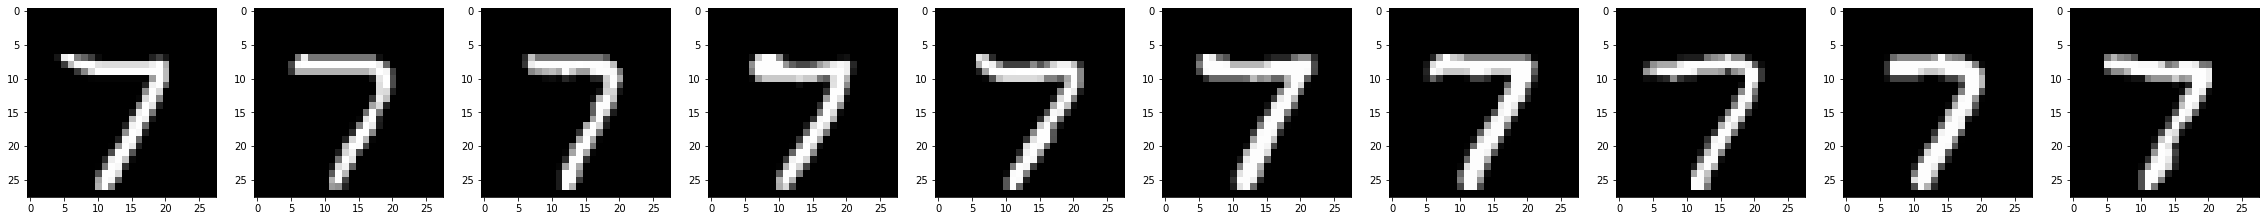

In [15]:
draw_mnist(indexes, distances, datasetTrainImages)